# Dataset 2: Airbus Wind Turbines Patches

### Import Libraries

In [ ]:
!pip install opendatasets
!pip install pillow
!pip install pandas
!pip install numpy
!pip install tensorflow
!pip install seaborn
!pip install matplotlib

In [4]:
import opendatasets as od
import os
import re
from PIL import Image

import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.preprocessing import image_dataset_from_directory

import matplotlib.pyplot as plt
import seaborn as sns

### Download Dataset

In [16]:
def downloadDataSet():
    url  = "https://www.kaggle.com/datasets/airbusgeo/airbus-wind-turbines-patches/download"
    path = "airbus-wind-turbines-patches"
    
    if os.path.exists(path):
        print("File already downloaded")
    else:
        od.download(url)
        print("File successfully downloaded")

In [26]:
def renameDirectory():
    path="airbus-wind-turbines-patches"
    if(os.path.exists(os.path.join(path, "train/windturbine"))):
        print("Folder already renamed")
    else:
        os.rename(os.path.join(path, "train/target"), os.path.join(path, "train/windturbine"))
        os.rename(os.path.join(path, "val/target"), os.path.join(path, "val/windturbine"))
        
        print("Folder successfully renamed")

In [28]:
downloadDataSet()
renameDirectory()

File already downloaded
Folder already renamed


### Load Dataset

In [2]:
def create_dataset(path):
    images = []
    target = []
    imagePaths = []
    
    directory = os.listdir(path)
    
    for direc in directory:
        print(direc)
        
        for file in os.listdir(os.path.join(path, direc)):
            imagePath = os.path.join(path, direc, file)
            image = np.array(Image.open(os.path.join(path, direc, file)))
            images.append(image)
            
            if re.search("target", direc):
                target.append(1)
            else:
                target.append(0)
                
            imagePaths.append(imagePath)
            
    print("Done")

    return pd.DataFrame({'imagePaths':imagePaths, 'images':images, 'target':target}, columns=['imagePath', 'images', 'label'])


In [3]:
dataset_train = create_dataset('C:/Users/milan/Documents/GitHub/Machine Learning Projects/Data/Wind-Turbine-Data/archive/train')
dataset_train.head()

dataset_eval = create_dataset("C:/Users/milan/Documents/GitHub/Machine Learning Projects/Data/Wind-Turbine-Data/archive/val")
dataset_eval.head()

background
target
Done
background
target
Done


,imagePath,images,label
0,NaN,"[[[138, 109, 65], [139, 110, 66], [140, 111, 6...",NaN
1,NaN,"[[[126, 95, 64], [131, 100, 69], [132, 101, 70...",NaN
2,NaN,"[[[47, 68, 37], [48, 69, 38], [48, 69, 38], [4...",NaN
3,NaN,"[[[39, 57, 33], [40, 58, 34], [40, 58, 34], [4...",NaN
4,NaN,"[[[43, 74, 43], [44, 75, 44], [45, 76, 45], [4...",NaN


#### Keras ImageLoader

In [7]:
def loadDataset():    
    path_train = "airbus-wind-turbines-patches/train"
    path_val   = "airbus-wind-turbines-patches/val"
    return image_dataset_from_directory(path_train), image_dataset_from_directory(path_val)

In [11]:
train_DS, val_DS = loadDataset()

Found 357507 files belonging to 2 classes.
Found 71504 files belonging to 2 classes.


In [12]:
class_names = train_DS.class_names
print(class_names)

['background', 'target']


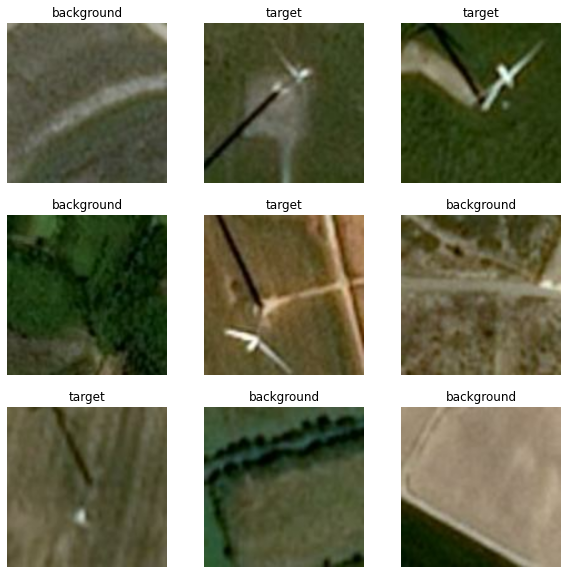

In [13]:
plt.figure(figsize=(10, 10))
for images, labels in train_DS.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_names[labels[i]])
    plt.axis("off")

### Data Analysis

In [20]:
number_classes = {
    'Windturbine_TRAIN': len(os.listdir(os.path.join(p_train, p_target))),
    'Background_TRAIN' : len(os.listdir(os.path.join(p_train, p_background))),
    'Windturbine_EVAL' : len(os.listdir(os.path.join(p_eval, p_target))),
    'Background_EVAL'  : len(os.listdir(os.path.join(p_eval, p_background))),
}

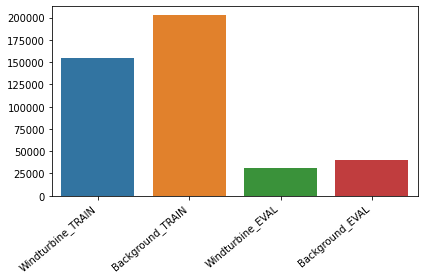

In [19]:
keys = list(number_classes.keys())
values = list(number_classes.values())

ax = sns.barplot(x=keys, y=values)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

In [ ]:
for n,d in directories.items():
    filepath = d
    filelist = [filepath + f for f in os.listdir(filepath)]
    dims = bag.from_sequence(filelist).map(get_dims)
    with diagnostics.ProgressBar():
        dims = dims.compute()
        dim_df = pd.DataFrame(dims, columns=['height', 'width'])
        sizes = dim_df.groupby(['height', 'width']).size().reset_index().rename(columns={0:'count'})
        sizes.plot.scatter(x='width', y='height');
        plt.title('Image Sizes (pixels) | {}'.format(n))

In [ ]:
directories = {'Class_0': 'data/Class_0/',
               'Class_1': 'data/Class_1/',
               'Class_2': 'data/Class_2/',
               'Class_3': 'data/Class_3/'}

In [ ]:
def get_dims(file):
    '''Returns dimenstions for an RBG image'''
    im = Image.open(file)
    arr = np.array(im)
    h,w,d = arr.shape
    return h,w